In [1]:
import time
import random
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Retrieve abbreviation data

In [2]:
abbreviations_df = pd.read_csv("Abbreviations and Slang.csv")
abbreviations = dict(zip(abbreviations_df["Abbreviations"], abbreviations_df["Text"]))

## Create utility functions to generate test data

In [3]:
def get_word_of_length(str_length):
    # generate a random word of given length
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(random.choice(chars) for _ in range(str_length))

def get_sentence_of_length(sentence_length): 
    sentence = "" 
    while (len(sentence) < sentence_length): 
        sentence += " " + get_word_of_length(random.choice(range(3,10)))
    return sentence[0:sentence_length]

## Build the Trie Tree data structure

In [4]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endValue = False

class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def insert(self, abbreviation: str, full: str):
        curr = self.root
        for char in abbreviation:
            if char not in curr.children:
                curr.children[char] = TrieNode()
            curr = curr.children[char]
        curr.endValue = full

    def search(self, abbreviation: str):
        curr = self.root
        for char in abbreviation:
            if char not in curr.children:
                return False
            curr = curr.children[char]
        return curr.endValue

def buildTrie():
    trie = Trie()
    for word in abbreviations:
        trie.insert(word, abbreviations.get(word))

    return trie

## Create the Hashmap & Trie Tree search-and-replace algorithms

In [5]:
def corpusHashMapUpdated(abbreviations, punctuations, text): 
    arr = []
    words = text.split()
    for word in words:
        loweredWord = word.lower()
        start = 0
        end = len(word) - 1
        while word[start] in punctuations and start < end:
            start += 1
        while word[end] in punctuations and start < end:
            end -= 1
        end += 1
        strippedWord = loweredWord[start:end]
        correspondingValue = abbreviations.get(strippedWord)
        if correspondingValue != None:
            arr.append("".join([word[0:start], correspondingValue, word[end:len(word)]]))
        else:
            arr.append(word)
    return " ".join(arr)

def corpusTrieUpdated(trie, punctuations, text):
    arr = []
    words = text.split()
    for word in words:
        loweredWord = word.lower()
        start = 0
        end = len(word) - 1
        while word[start] in punctuations and start < end:
            start += 1
        while word[end] in punctuations and start < end:
            end -= 1
        end += 1
        strippedWord = loweredWord[start:end]
        correspondingValue = trie.search(strippedWord)
        if correspondingValue:
            arr.append("".join([word[0:start], correspondingValue, word[end:len(word)]]))
        else:
            arr.append(word)
    return " ".join(arr)

## Prepare the utility functions to analyze the runtime of each algorithm

In [6]:
def evaluateHashMapRunTimeUpdated(start, end, stepSize, numTrials):
    nValuesHashMap = []
    tValuesHashMap = []
    for n in range(start, end+1, stepSize):
        runTime = 0
        for _ in range(numTrials):
            text = get_sentence_of_length(n)
            start = time.time()
            corpusHashMapUpdated(abbreviations, "#,?!", text)
            end = time.time()
            runTime += (end - start) * 1000
        runTime = runTime / numTrials
        nValuesHashMap.append(n)
        tValuesHashMap.append(runTime)
    return nValuesHashMap, tValuesHashMap

# Seperate function as trie should be built per size n
def evaluateTrieRunTimeUpdated(start, end, stepSize, numTrials):
    nValuesTrie = []
    tValuesTrie = []
    trie = buildTrie()
    for n in range(start, end+1, stepSize):
        runTime = 0
        for _ in range(numTrials):
            text = get_sentence_of_length(n)
            start = time.time()
            corpusTrieUpdated(trie, "#,?!", text)
            end = time.time()
            runTime += (end - start) * 1000
        runTime = runTime / numTrials
        nValuesTrie.append(n)
        tValuesTrie.append(runTime)
    return nValuesTrie, tValuesTrie



## Launch tests

In [13]:
start = 100_000
end = 10_000_000
stepSize = 100_000
numTrials = 2

nValuesHashMapUpdated, tValuesHashMapUpdated = evaluateHashMapRunTimeUpdated(start, end, stepSize, numTrials)
nValuesTrieUpdated, tValuesTrieUpdated = evaluateTrieRunTimeUpdated(start, end, stepSize, numTrials)

KeyboardInterrupt: 

## Plot results

Text(0.5, 1.0, 'Corpus Implementation')

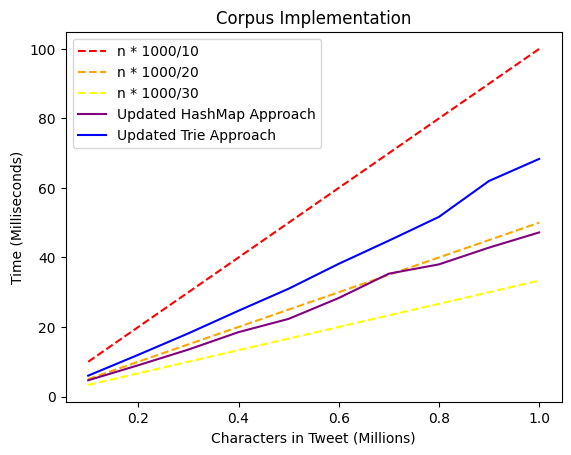

In [12]:
plt.plot([x * 1/1000000 for x in nValuesTrieUpdated], [x/10000 for x in nValuesTrieUpdated], "--", color="red", label="n * 1000/10")
plt.plot([x * 1/1000000 for x in nValuesTrieUpdated], [x/20000 for x in nValuesTrieUpdated], "--", color="orange", label="n * 1000/20")
plt.plot([x * 1/1000000 for x in nValuesTrieUpdated], [x/30000 for x in nValuesTrieUpdated], "--", color="yellow", label="n * 1000/30")
plt.plot([x * 1/1000000 for x in nValuesHashMapUpdated], tValuesHashMapUpdated, color="purple", label="Updated HashMap Approach")
plt.plot([x * 1/1000000 for x in nValuesTrieUpdated], tValuesTrieUpdated, color="blue", label="Updated Trie Approach")
plt.xlabel("Characters in Tweet (Millions)")
plt.ylabel("Time (Milliseconds)")
plt.legend()
plt.title("Corpus Implementation")